## Title:- Portuguese Bank Marketing Project

### Project Member's Name:
Mohamed Shafeeq VP

Sonali Kundu

Sujval Rai

Loh Xiao Tong

### Project Code: PRCP-1000-ProtugeseBank

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

## Businesscase:- To predict the client of the bank will subscribed a term deposit or not?
#### Binary classification

In [2]:
## read the dataset
data=pd.read_csv('bank-additional-full.csv',sep=';',na_values='unknown')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Basic Checks

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Basic Understanding of Features --> Domain Analysis

Input variables:
   # bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone")
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)    
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Exploratory Data Analysis:-
### univariate Analysis

In [3]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [3]:
## Renaming certain columns just to make analysis easy
data.rename(columns={'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx',
                     'cons.conf.idx':'cons_conf_idx',
                     'nr.employed':'nr_employed'}
            ,inplace=True)

In [14]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
##!pip install sweetviz

import sweetviz as sv
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate or Multivariate Analysis

In [4]:
data1=data[['age','duration','campaign','pdays','previous','emp_var_rate',
           'cons_price_idx','cons_conf_idx','euribor3m','nr_employed']]
data1

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


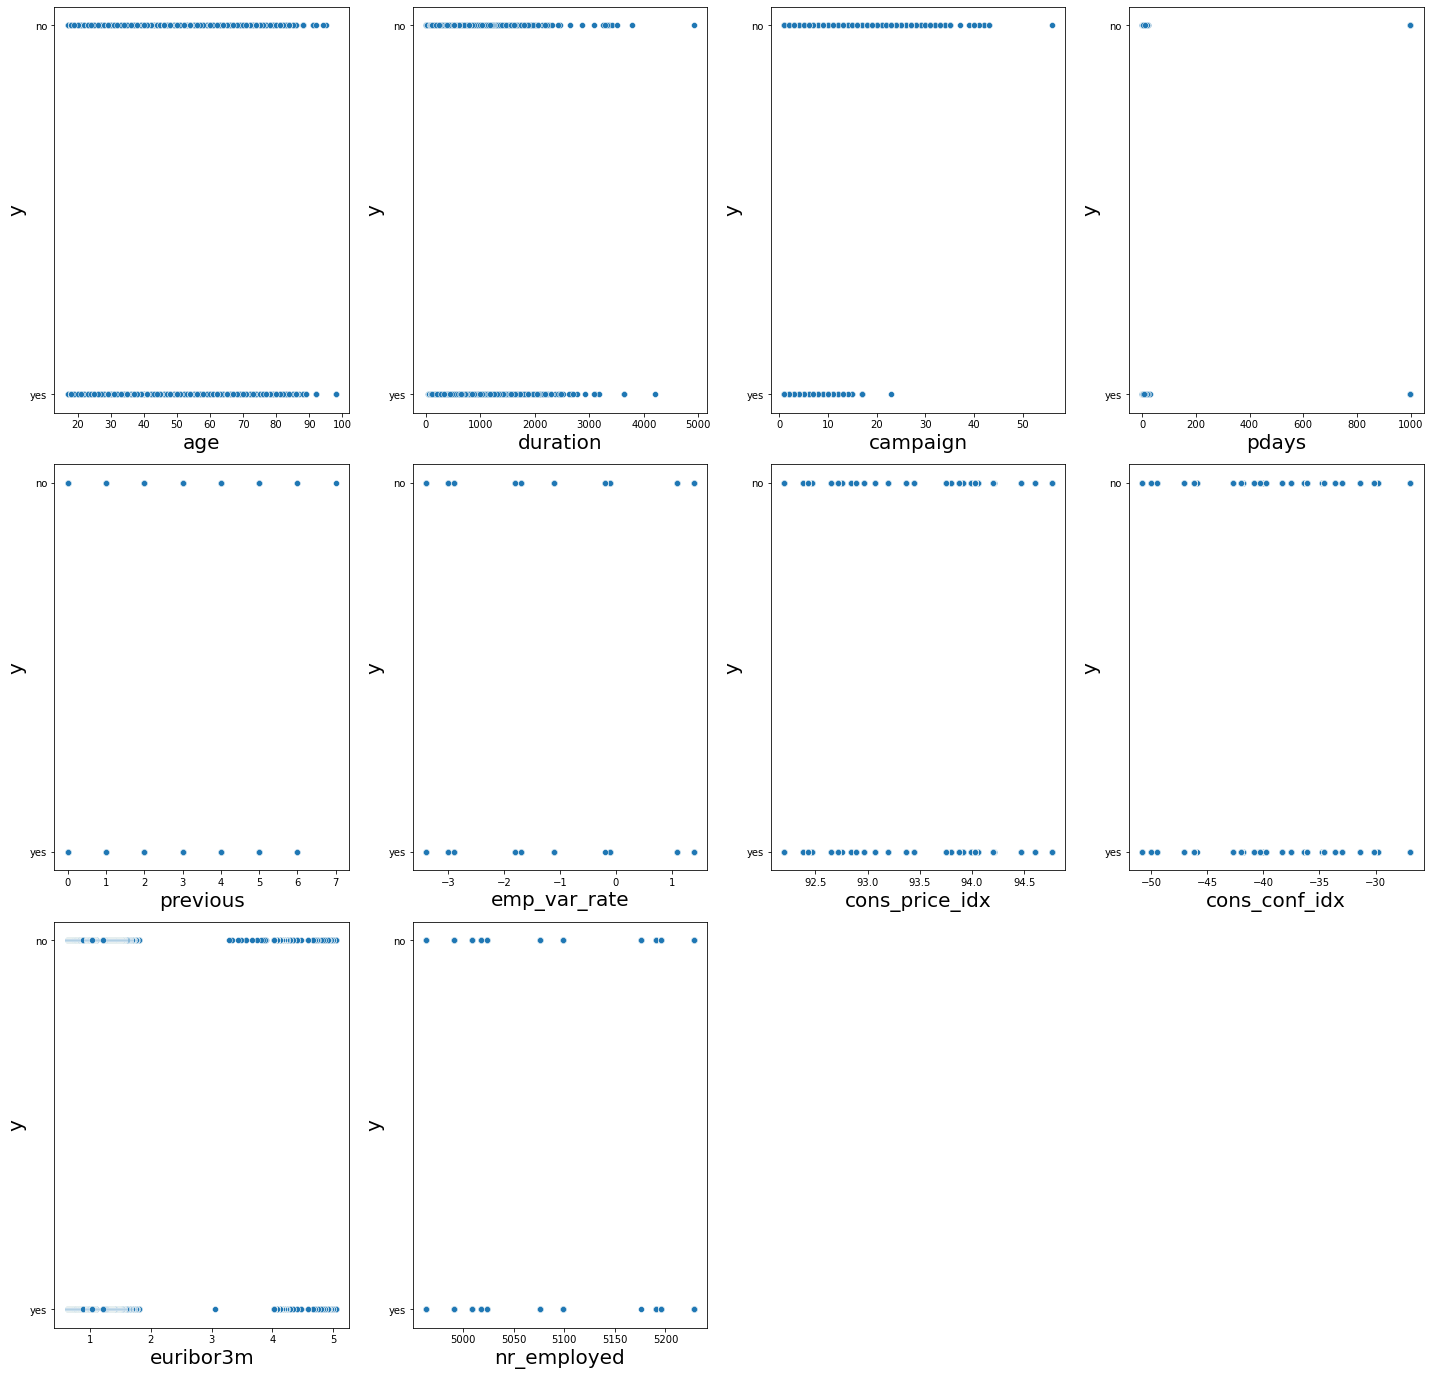

In [6]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=10 :   ## as there is 10 columns
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data1[column].dropna(axis=0)
                        ,y=data.y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('y',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

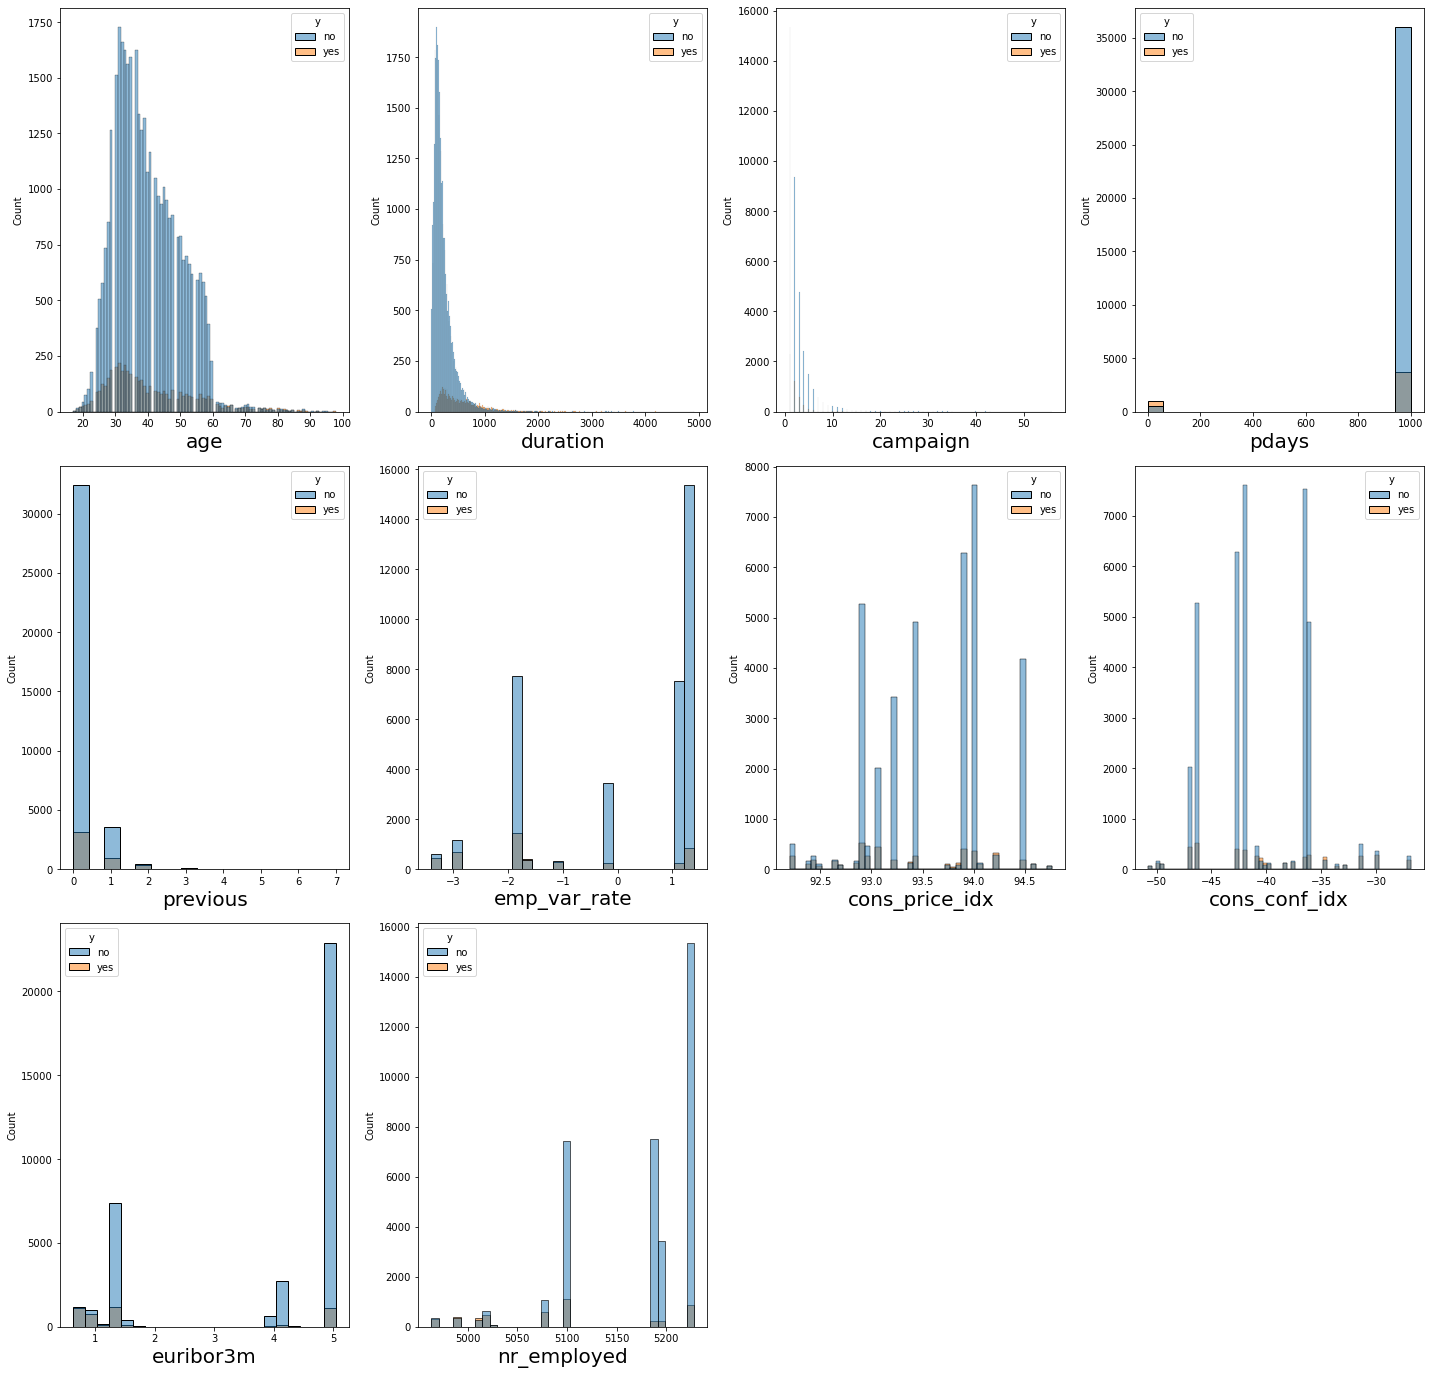

In [7]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data1[column],hue=data.y)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

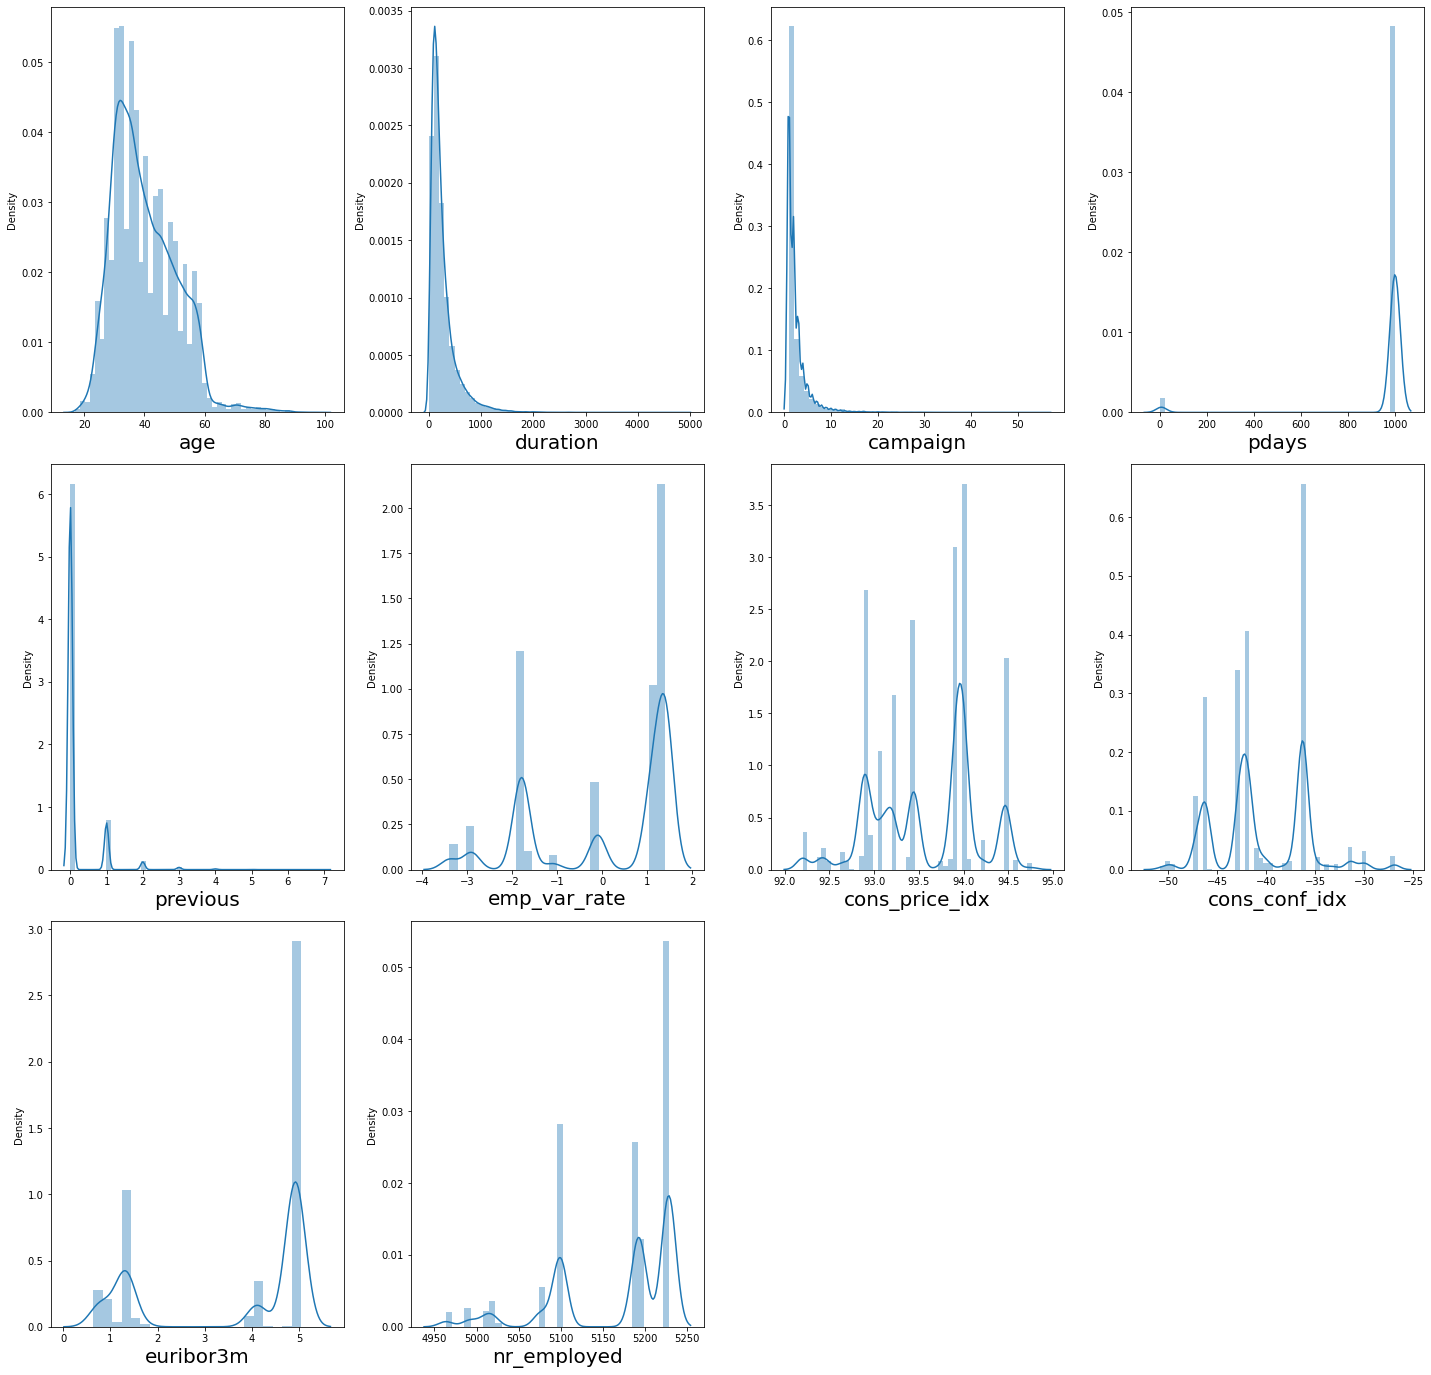

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=data1[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

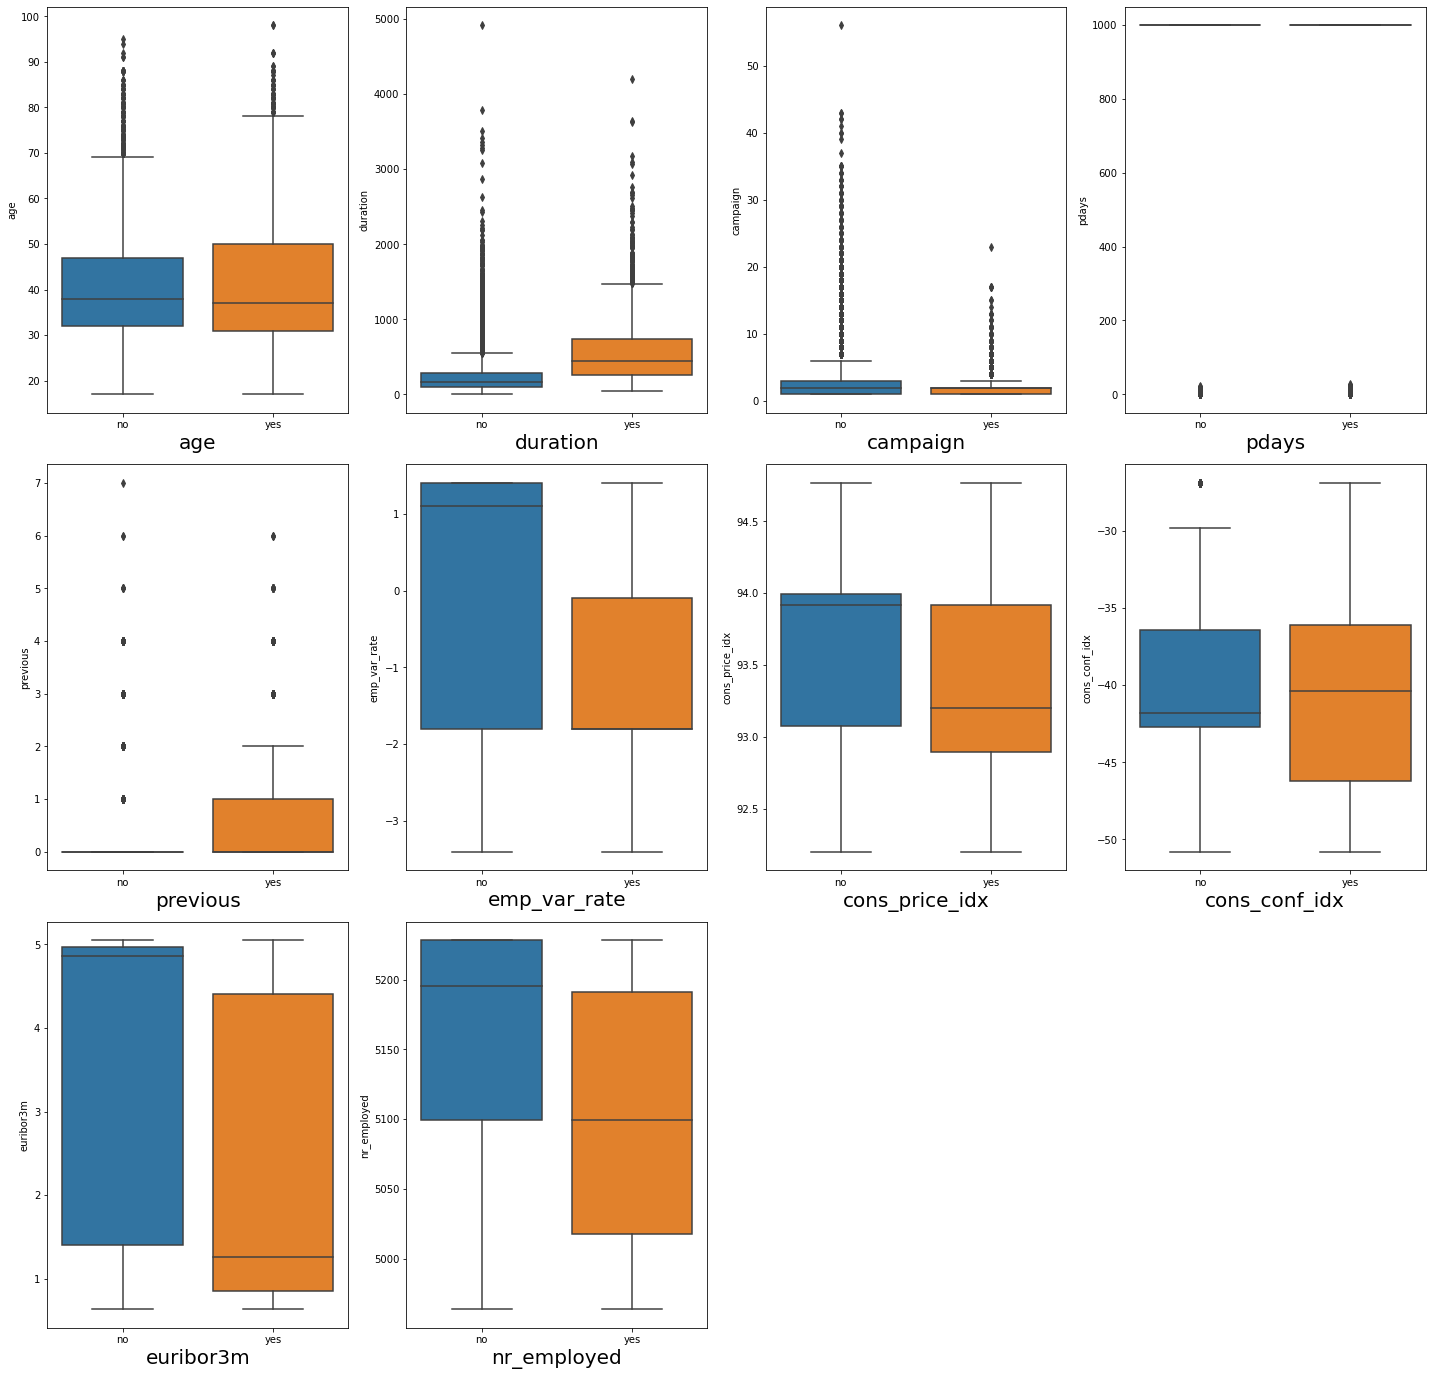

In [18]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=data.y,y=data1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

## Data Insights from Bivariate Analysis

### Insights from Sonali Kundu:
Age: people within the range of 30-40 years of age are more interested to take term deposit plan, and clients more than 60 years of age are least interested in the plan.From the above plots we know that for both the customers that subscibed or didn’t subscribe a term deposit, has a median age of around 38–40. And the plots for both the classes overlap quite a lot, which means that age isn’t necessarily a good indicator for which customer will subscribe and which customer will not.

Duration:This feature is very interesting in our case study. It denotes the duration of the last contact, in seconds. It is mentioned in the source of the dataset:
Important note: This attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call, the target variable y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
So with this we know that this feature will be very interesting xD. And we also know that we will not be able to include this feature in our final models, as obviously we want to create a realistic predictive model that can be used by the business. But, we will surely implement a basic model with the duration feature just to see how much of an impact this feature makes. So with that, let’s look into the box plot and pdf of this feature.From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

Campaign:number of contacts performed during this campaign and for a particular client.From the scatterplot we can see that when a client is contacted for more than 20 times, most of their reply is no for the Term Deposit plan, So if we contact maximum within 20 times a perticular client that will be enough to know if any client is going for the plan or not,it will save the time for bank marketing.

emp_var_rate: Employment variation rate, quarterly indicator. Even though this and some other features like “previous” etc are numerical features, they have a limited number of unique values which occur repeatedly.Here is a value count of the emp.var.rate feature. 
1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10


pdays:number of days that passed by after the client was last contacted from a previous campaign. Here 999 means client was not previously contacted.So from the histplot we can see that maximum clients were not previously contacted, and those clients are also not interested to take Term deposit. But those clients who were previously contacted those are more interested for taking Term deposit,So pdays is a good foactor to detect our target variable.

previous:number of contacts performed before this campaign and for a particular client.From the graph we can see that for maximum number of clients any contact does not performeed by bank, so Those clients also not interested for Term Deposit, So we can say that if before campaign a particular client is contacted by bank, they can be more interested for Term Deposit plan.

cons_price_idx:consumer price index - monthly indicator.


cons_conf_idx:consumer confidence index - monthly indicator.
euribor3m:
euribor 3 month rate, daily indicator. The euribor denotes the basic rate of interest used in lending between banks on the European Union interbank market and also used as a reference for setting the interest rate on other loans.
From the above boxplot, we can clearly see the difference in median for both the classes. This indicates that the feature can be very useful for our case study. But we can validate the assumption only by applying models and extracting feature importance.

nr_employed:number of employee.



### Insights from Xiao Tong:
age: kurtosis<3,skewness<1-->thick bell ,moderately skew ,right skew.Most clients are 25-40year old

duration:kurtosis>3,skewness>1--->thin bell,heavily right skew;
last contact duration,4918 in seconds (3hrs 42minutes).


campaign:kurtosis>3,skewness>1--->thin bell,heavily right skew;number of contacts performed before this campaign and for this client lies between 0-5

pdays:
kurtosis<3,skewness<-1--->thin bell,heavily left skew 
number of days that passed by after the client was last contacted from a previous campaign is -1.-1 means client was not previously contacted


previous:kurtosis>3,skewness>1--->thin bell,heavily right skew
The highest number of contacts performed before this campaign and for this client is 0-3

empvarrate:Most clients have 1-2  as this value,means change job frequent

conspriceidx:kurtosis<3,skewness<1--->thin bell,moderate right skew
Most clients gives 93-94.3 to the value of services

consconfidx::kurtosis<3,skewness<1--->thin bell,moderate left skew
most data lies between -40--35

euribor3m:kurtosis<3,skewness<-1--->thin bell,heavily left skew
The most highest interest rate is 5

nremployed:kurtosis<3,skewness<1--->thin bell,heavily left skew
Most  have 5200-5250 employees

In [6]:
data.cons_conf_idx.value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons_conf_idx, dtype: int64

In [1]:
# Build a function to show categorical values disribution
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = data[data['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = data[data['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show()

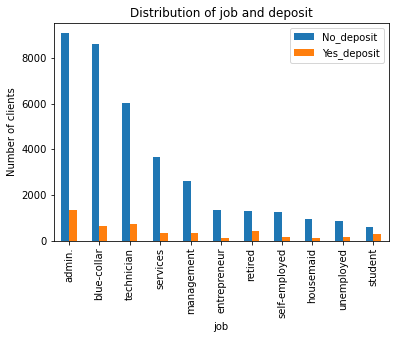

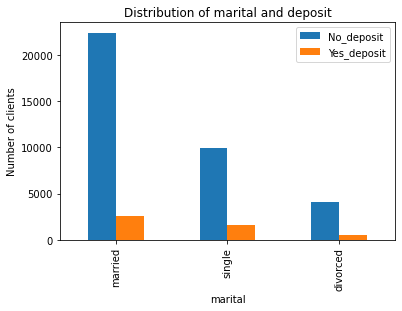

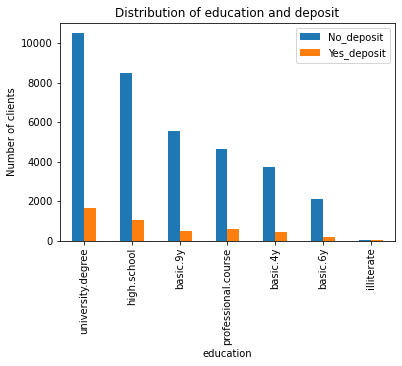

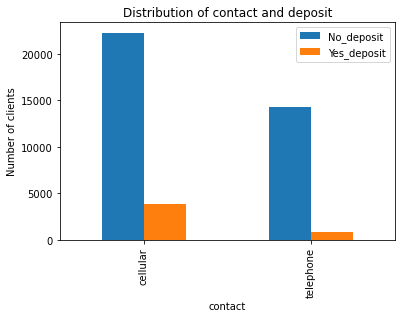

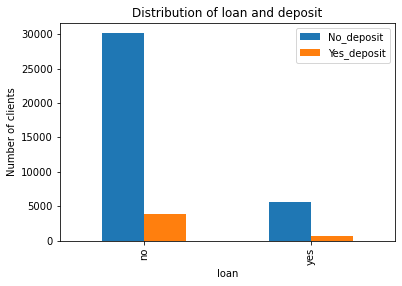

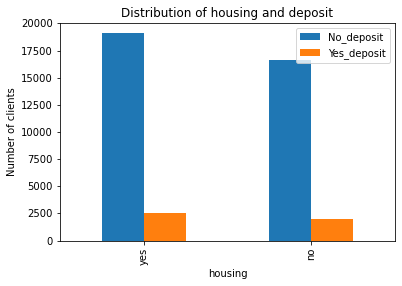

(None, None, None, None, None, None)

In [6]:
plot_bar('job'), plot_bar('marital'), plot_bar('education'), plot_bar('contact'), plot_bar('loan'), plot_bar('housing')

Primary analysis of several categorical features reveals:

Administrative staff and technical specialists opened the deposit most of all. In relative terms, a high proportion of pensioners and students might be mentioned as well.
Although in absolute terms married consumers more often agreed to the service, in relative terms the single was responded better.
Best communication channel is cellular.
The difference is evident between consumers who already use the services of banks and received a loan.
Home ownership does not greatly affect marketing company performance.

## Categorical Feature Distributions

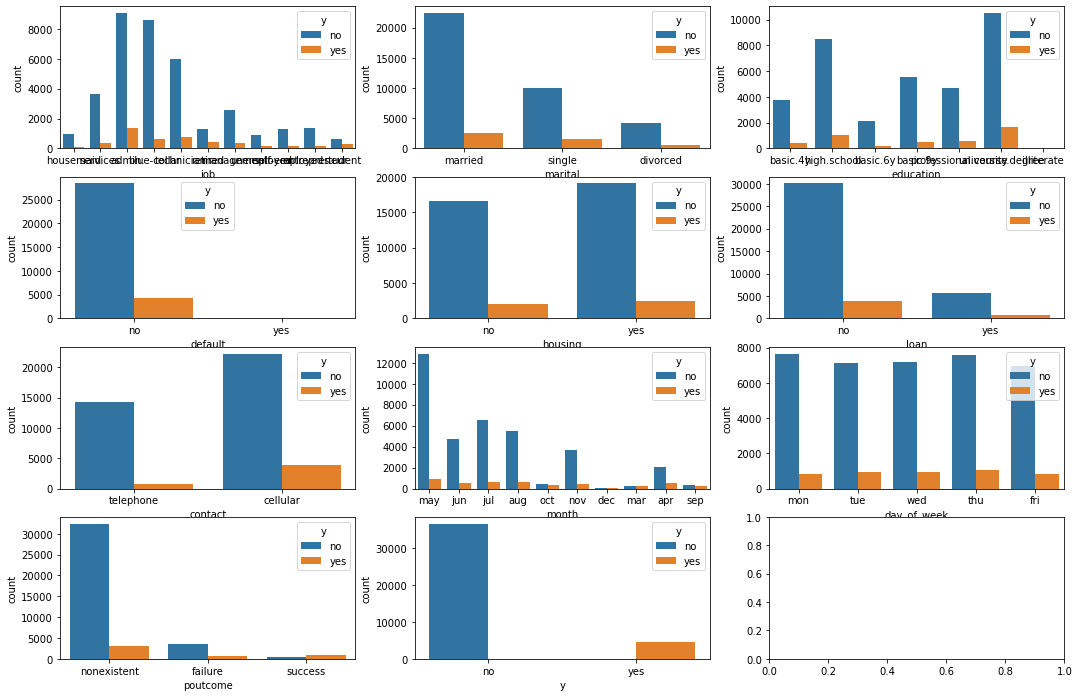

In [8]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan',
               'contact', 'month','day_of_week', 'poutcome','y']
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
for col, ax in zip(categorical[0:], axs.ravel()):
    sns.countplot(x=col, data=data, ax=ax,hue=data.y)

### Insights from Sonali Kundu:
Job: The type of job the customers have. Let’s call the count plot function defined earlier to plot the count plot of the job feature.From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

Marital:This simply denotes the customer’s marital status.Majority of the customers are married. Followed by Single, divorced and unknown.

Education:Most of the customers have University Degree.

Default:Almost All customers have no default credits.

Housing:Most of the customers have housing loans, but almost no-having housing loan customers numbers are almost equal as having housing loans.

loan:Most of the clients are having no loans and those clients are also more interested in term deposit than those clients who are having loan.

Contact:Most of the customers have shared Cellular contact information.

month:Maximum customers were last connected in the month of May.

day_of_week:This feature denotes the last contact day of the week (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’.As we can see clearly from the above plot that, all the days have the similar distribution for both the classes. 17–18% of the customers on any given day refuse to subscribe to a term deposit, and 2.1–2.5% of customers agrees to subscribe. With this we can deduce that this feature will not be very helpful in predicting the target variable.

poutcome:This feature denotes the outcome of the previous marketing campaign.
For most of the customers, the previous marketing campaign outcome does not exists. It means that most of the customers are new customers who have not been contacted earlier. Also one thing to note here that, for the customers who had a successful outcome from the previous campaign, majority of those customers did subscribe for a term deposit. As it has the class distribution of 2.2% for positive class, and 1.2% for negative class. From this, we can make an assumption, that this feature may hold some value in predicting the target variable. specially poutcome_success category.

y:According to the marketing we can see that the clients least interested for the subscription to a term deposit. 

### Insights from Mohamed Shafeeq VP:
1)Job: admin, bluecollar and technician has made the maximum subscription,while unemployed,self employed,enterpreuners and students have made the least subscription.

2)education: Those people who are having a university degree are more likely to subscribe.

3)default: Those people who have credits will not subscribe.

4)loan: Those people who have loan will not subscribe.

5)month: Maximum conversion rate is seen in the months of may to august.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data Preprocessing

In [5]:
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

In [11]:
## Imputing the missing values
## job, education,contact,poutcome has missing values and as they are object type data,
##so compute the missing values wee need to use mode

In [12]:
## Getting the rows where values got missed
data.loc[data['job'].isnull()==True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
29,55,NaN,married,university.degree,NaN,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
35,55,NaN,married,basic.4y,NaN,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
73,57,NaN,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
91,57,NaN,married,NaN,NaN,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
144,38,NaN,divorced,high.school,NaN,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40370,59,NaN,married,NaN,no,no,no,cellular,aug,wed,...,1,6,1,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40428,64,NaN,married,NaN,no,yes,no,telephone,aug,fri,...,4,999,0,nonexistent,-1.7,94.027,-38.3,0.905,4991.6,yes
40656,67,NaN,divorced,NaN,NaN,yes,no,cellular,sep,wed,...,2,6,2,success,-1.1,94.199,-37.5,0.880,4963.6,yes
41005,63,NaN,married,professional.course,no,no,no,cellular,oct,thu,...,1,6,1,success,-1.1,94.601,-49.5,1.025,4963.6,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [5]:
## Impuation using inbuild method fillna.
data['job'] = data['job'].fillna(data['job'].mode()[0])

data['marital'] = data['marital'].fillna(data['marital'].mode()[0])

data['education'] = data['education'].fillna(data['education'].mode()[0])

data['default'] = data['default'].fillna(data['default'].mode()[0])

data['housing'] = data['housing'].fillna(data['housing'].mode()[0])

data['loan'] = data['loan'].fillna(data['loan'].mode()[0])

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [18]:
## There are categorical data need to convert them into numerical

In [19]:
data.job.value_counts()

admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [7]:
data.job=data.job.map({'admin.':1,'blue-collar':2,'technician':3,'services':4,'management':5,'retired':6,
                       'entrepreneur':7,'self-employed':8,'housemaid':9,'unemployed':10,'student':11 })

In [23]:
data.job.value_counts()

1     10752
2      9254
3      6743
4      3969
5      2924
6      1720
7      1456
8      1421
9      1060
10     1014
11      875
Name: job, dtype: int64

In [24]:
data.marital.value_counts(())

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [8]:
data.marital=data.marital.map({'married':1,'single':2,'divorced':3})

In [26]:
data.education.value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [9]:
data.education=data.education.map({'university.degree':1,'high.school':2,'basic.9y':3,'professional.course':4,
                                   'basic.4y':5,'basic.6y':6,'illiterate':7})

In [47]:
data.default.value_counts()

Series([], Name: default, dtype: int64)

In [10]:
data.default=data.default.map({'no':0,'yes':1})

In [11]:
data.housing.value_counts()

yes    22566
no     18622
Name: housing, dtype: int64

In [12]:
data.housing=data.housing.map({'no':0,'yes':1})

In [34]:
data.loan.value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

In [13]:
data.loan=data.loan.map({'no':0,'yes':1})

In [36]:
data.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [14]:
data.month=data.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
                           'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  object 
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [48]:
data.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [16]:
## Converting the numerical equivalent
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['contact']=le.fit_transform(data['contact'])

In [51]:
data.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [17]:
data.day_of_week=data.day_of_week.map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5})

In [31]:
data.poutcome.value_counts()

0    35563
1     4252
2     1373
Name: poutcome, dtype: int64

In [18]:
data.poutcome=data.poutcome.map({'nonexistent':0,'failure':1,'success':2})

In [55]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [19]:
data.y=data.y.map({'no':0,'yes':1})

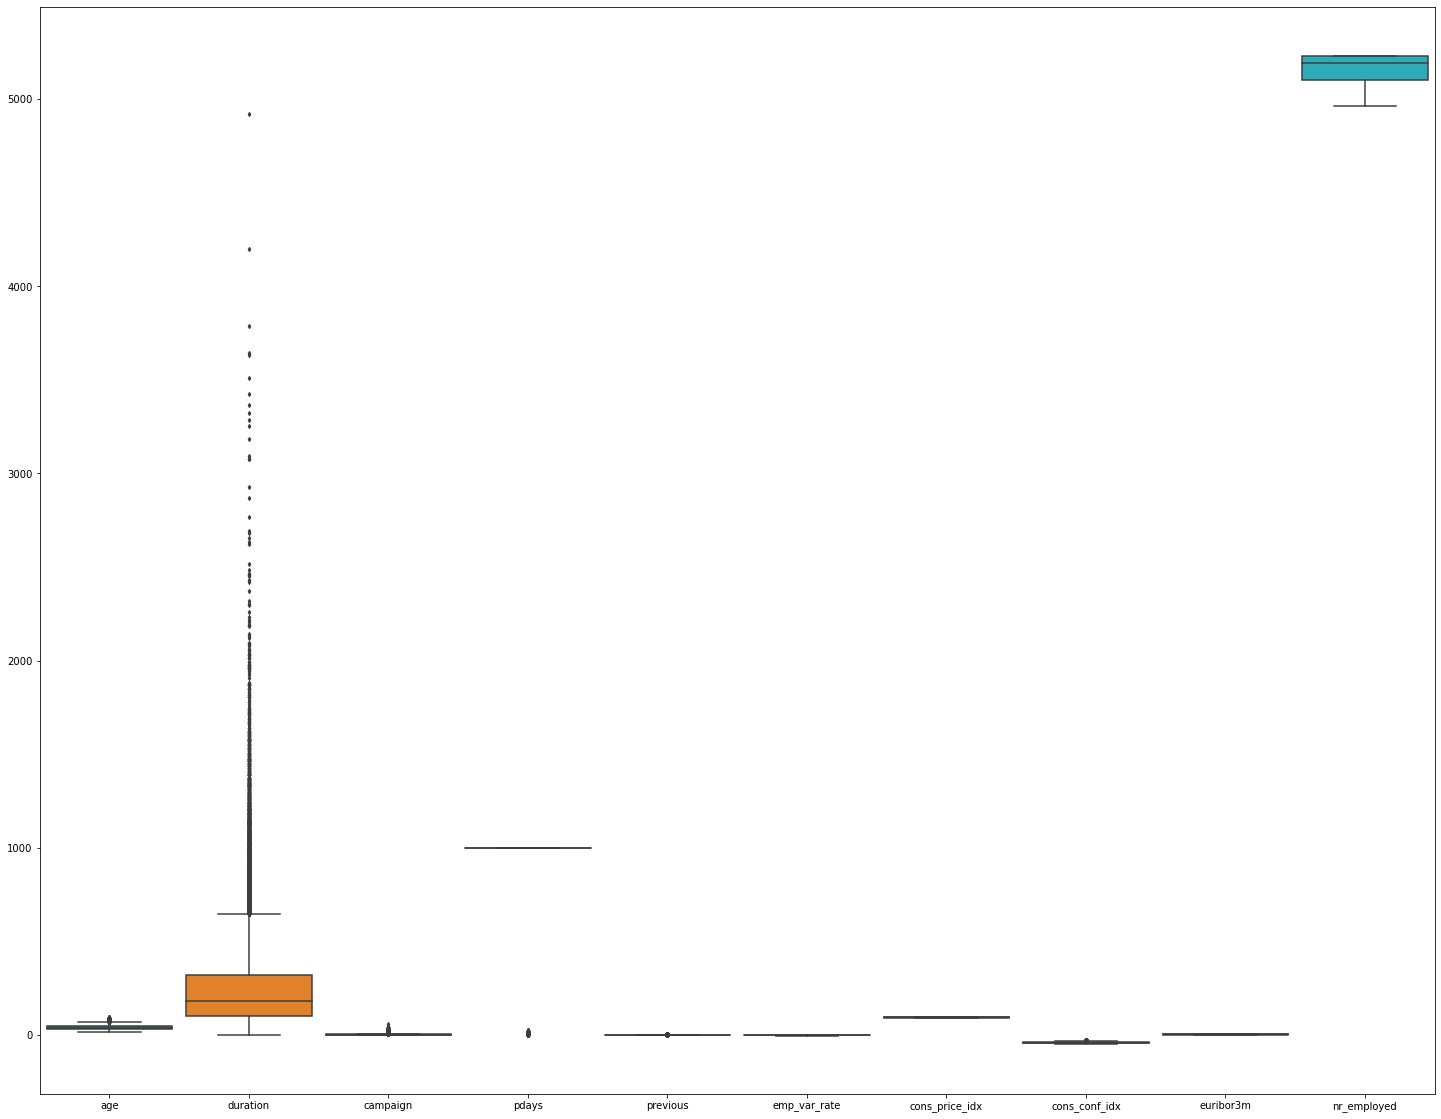

In [20]:
## Lets check outliers in any
## chekcing the outliers
fig, ax = plt.subplots(figsize=(25,20))
sns.boxplot(data=data1, width= 0.9,ax=ax,  fliersize=3)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pdays'>

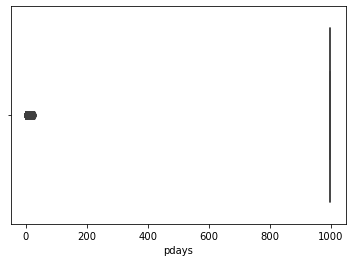

In [81]:
sns.boxplot(data.pdays)

 for this dataset no outlier treatment is required

## Feature Selection

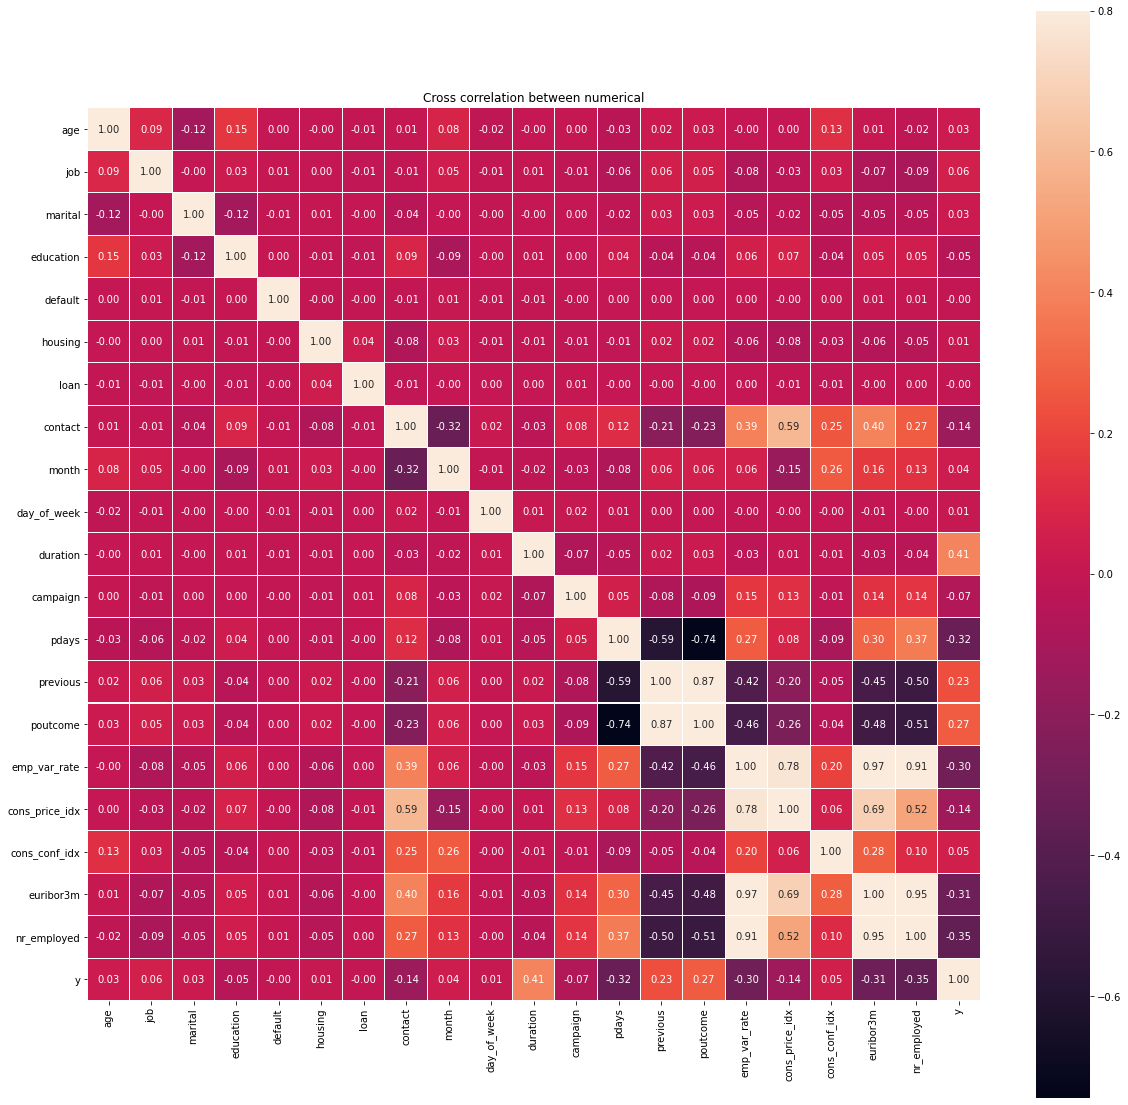

In [18]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()
## there is highly correlative columns like 
##emp_var_rate,euribor3m are highly correlated to each other,so we will drop one of them
##emp_var_rate,nr_employed are highly correlated to each other, so we will drop one of them
##euribor3m,nr_employed are highly correlated to each other, so we will drop one of them

In [7]:
data2 = data.drop(['emp_var_rate','nr_employed'],axis=1)
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [8]:
## checking the duplicate rows
data2.duplicated().sum()

12

In [22]:
## droping the duplicate rows
data2.drop_duplicates(inplace=True)

In [21]:
## checking the constant features
data2.describe()
## the standard deviation of all features are not 0 ,so the there are constant features in the dataset.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,euribor3m,y
count,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000
mean,40.023583,3.427649,1.504833,2.592874,0.000073,0.547919,0.151746,0.365279,6.607738,2.979623,258.323627,2.567956,962.463035,0.173022,0.169962,93.575713,-40.503070,3.621231,0.112668
std,10.420578,2.600824,0.688451,1.567050,0.008536,0.497705,0.358779,0.481514,2.041036,1.411531,259.309058,2.770364,186.941469,0.494975,0.455820,0.578849,4.627877,1.734456,0.316191
min,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,92.201000,-50.800000,0.634000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,102.000000,1.000000,999.000000,0.000000,0.000000,93.075000,-42.700000,1.344000,0.000000
50%,38.000000,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,180.000000,2.000000,999.000000,0.000000,0.000000,93.749000,-41.800000,4.857000,0.000000
75%,47.000000,5.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,8.000000,4.000000,319.000000,3.000000,999.000000,0.000000,0.000000,93.994000,-36.400000,4.961000,0.000000
max,98.000000,11.000000,3.000000,7.000000,1.000000,1.000000,1.000000,1.000000,12.000000,5.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,94.767000,-26.900000,5.045000,1.000000


## Model Creation

In [23]:
## Defining X and y and creating dependent and independent variables
X = data2.drop(columns = ['y']) ## independent variable
y = data2['y'] ## Dependent or target variable"

In [24]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,euribor3m
0,56,9,1,5,0,0,0,1,5,1,261,1,999,0,0,93.994,-36.4,4.857
1,57,4,1,2,0,0,0,1,5,1,149,1,999,0,0,93.994,-36.4,4.857
2,37,4,1,2,0,1,0,1,5,1,226,1,999,0,0,93.994,-36.4,4.857
3,40,1,1,6,0,0,0,1,5,1,151,1,999,0,0,93.994,-36.4,4.857
4,56,4,1,2,0,0,1,1,5,1,307,1,999,0,0,93.994,-36.4,4.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,4,0,1,0,0,11,5,334,1,999,0,0,94.767,-50.8,1.028
41184,46,2,1,4,0,0,0,0,11,5,383,1,999,0,0,94.767,-50.8,1.028
41185,56,6,1,1,0,1,0,0,11,5,189,2,999,0,0,94.767,-50.8,1.028
41186,44,3,1,4,0,0,0,0,11,5,442,1,999,0,0,94.767,-50.8,1.028


In [112]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41174, dtype: int64

In [25]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X)

In [26]:
## Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X_scaled,y)
print(Counter(y_sm))

Counter({0: 36535, 1: 4639})
Counter({0: 36535, 1: 36535})


In [27]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_sm,y_sm, test_size= 0.20,random_state = 355)

## Logistic Regression Model

In [41]:
##Model1 creation
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()## object Creation

model1.fit(x_train,y_train)## fitting the model with training data

LogisticRegression()

Let's see how well our model performs on the test data set.

In [43]:
y_pred = model1.predict(x_test)

In [44]:
pd.crosstab(y_test,y_pred)

col_0,0,1
y,,
0,6247,1085
1,978,6304


In [45]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8588339947995073

In [46]:
# Precison
Precision = precision_score(y_test,y_pred)
Precision

0.8531601028555962

In [47]:
# Recall
Recall = recall_score(y_test,y_pred)
Recall

0.8656962372974457

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      7332
           1       0.85      0.86      0.86      7282

    accuracy                           0.86     14614
   macro avg       0.86      0.86      0.86     14614
weighted avg       0.86      0.86      0.86     14614



### KNN Model

In [44]:
### creating 2nd model
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)
y_hat1=model2.predict(x_test)

In [45]:
## for logestic regression model
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_pred)
score

0.7346646732453764

In [46]:
## for KNN model
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_hat1)
score

0.9270148628556418

In [127]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

C:\Users\Ariya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ariya\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

[0.94354669 0.94427698 0.96102123 0.79835393 0.86301501]
Cross validation Score: 0.9020427698847229
Std : 0.062063359789044634


In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.78694527 0.70774076 0.76160429 0.66786196 0.751432  ]
Cross validation Score: 0.7351168551646341
Std : 0.042253102828566244


In [48]:
error_rate=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error rate')

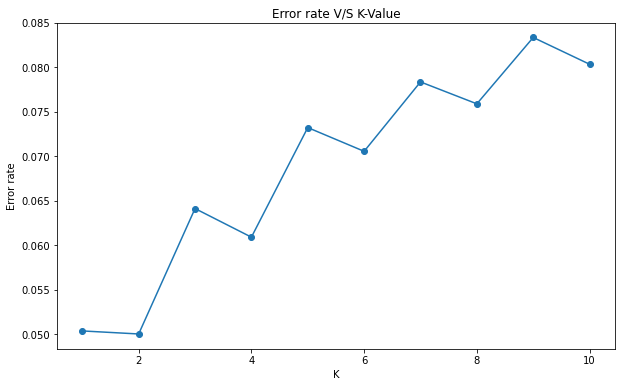

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,marker='o')
plt.title('Error rate V/S K-Value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [51]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [52]:
acc=accuracy_score(y_test,y_pred)
acc

0.949979471739428

In [53]:
recall=recall_score(y_test,y_pred)
recall

0.9826970612469101

In [54]:
f1=f1_score(y_test,y_pred)
f1

0.9514059695539453

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7332
           1       0.92      0.98      0.95      7282

    accuracy                           0.95     14614
   macro avg       0.95      0.95      0.95     14614
weighted avg       0.95      0.95      0.95     14614



### Bagging Classifier Model

In [51]:
## using Bagging
from sklearn.ensemble import BaggingClassifier
model_bagg1=BaggingClassifier(base_estimator=model2,n_estimators=10) ## model objet creation

model_bagg1.fit(x_train,y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(x_test) ## getting the prediction

In [52]:
f1_score(y_test,y_hat_bagg,average='weighted') ## f1  score calculation

0.9257735582362723

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_bagg1,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.84775648 0.72765524 0.80880159 0.68545211 0.7630226 ]
Cross validation Score: 0.7665376052412208
Std : 0.0574139362111887


### Random Forest Model

In [75]:
## model4 creation
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(n_estimators=100)
model4.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
y_predict=model4.predict(x_test)
y_predict

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7332
           1       0.94      0.98      0.96      7282

    accuracy                           0.96     14614
   macro avg       0.96      0.96      0.96     14614
weighted avg       0.96      0.96      0.96     14614



In [78]:
f_Score=f1_score(y_test,y_predict)
f_Score

0.9566094853683149

In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model4,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.308826   0.2058138  0.21000816 0.09241898 0.16533502]
Cross validation Score: 0.196480394420457
Std : 0.07027155941253711


### SVM Model

In [28]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [29]:
y_pred=svc.predict(x_test)

In [30]:
acc=accuracy_score(y_test,y_pred)
acc

0.899616805802655

In [32]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.89      7332
           1       0.86      0.95      0.90      7282

    accuracy                           0.90     14614
   macro avg       0.90      0.90      0.90     14614
weighted avg       0.90      0.90      0.90     14614



In [33]:
f_Score=f1_score(y_test,y_pred)
f_Score

0.9043988269794722

### Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [35]:
acc=accuracy_score(y_test,y_pred)
acc

0.9268509648282469

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7332
           1       0.92      0.93      0.93      7282

    accuracy                           0.93     14614
   macro avg       0.93      0.93      0.93     14614
weighted avg       0.93      0.93      0.93     14614



In [37]:
f_Score=f1_score(y_test,y_pred)
f_Score

0.9270356972220326

### Naive Bayes Model

In [38]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB(alpha=0.01)
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [39]:
acc=accuracy_score(y_test,y_pred)
acc

0.7349117284795401

In [40]:
recall=recall_score(y_test,y_pred)
recall

0.6624553694040098

In [41]:
f1=f1_score(y_test,y_pred)
f1

0.7135039195385297

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.75      7332
           1       0.77      0.66      0.71      7282

    accuracy                           0.73     14614
   macro avg       0.74      0.73      0.73     14614
weighted avg       0.74      0.73      0.73     14614



### GradientBoostingClassifier Model

In [56]:
## importing the 5th model library

from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(x_train,y_train) ## fitting the data
y_gbm=gbm.predict(x_test)


In [58]:
acc=accuracy_score(y_test,y_gbm)
acc

0.9319830299712605

In [59]:
recall=recall_score(y_test,y_pred)
recall

0.9826970612469101

In [61]:
# Precison
Precision = precision_score(y_test,y_pred)
Precision

0.9220461280762788

In [60]:
f1=f1_score(y_test,y_pred)
f1

0.9514059695539453

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7332
           1       0.92      0.98      0.95      7282

    accuracy                           0.95     14614
   macro avg       0.95      0.95      0.95     14614
weighted avg       0.95      0.95      0.95     14614



### XGB Model

In [63]:
from xgboost import XGBClassifier

In [64]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [65]:
acc=accuracy_score(y_test,y_pred)
acc

0.9523060079375941

In [66]:
recall=recall_score(y_test,y_pred)
recall

0.9522109310628948

In [67]:
f1=f1_score(y_test,y_pred)
f1

0.9521455544112599

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7332
           1       0.95      0.95      0.95      7282

    accuracy                           0.95     14614
   macro avg       0.95      0.95      0.95     14614
weighted avg       0.95      0.95      0.95     14614



### Hyperparameter Tuning for the Best Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 40, num=9)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=model4, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits



Inference: It's evident that Random Forest is performing better than other models.